In [1]:
import LancasterAQ as laq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import osmnx as ox
import numpy as np
import networkx as nx
sns.set_theme(context='paper', style='whitegrid',font='serif',)

%load_ext autoreload
%autoreload 2

In the package a number of data types are available:
- a pandas table
- a numpy object
- a networkx graph
- a geojson

### Pandas

In [2]:
df = laq.TabularObject().to_pandas()
df.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,driving,8.793612,0
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,driving,8.867287,0
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0
3,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0
4,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0


To subset to time, trip type or trip number we can do the the following

In [3]:
df_trip1 = df[df['trip_index'] == 2]
df_trip1.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
15626,2022-05-04 14:54:08,54.008697,-2.788345,17913.0,driving,9.793338,2
15627,2022-05-04 14:54:09,54.008697,-2.788347,17193.0,driving,9.752316,2
15628,2022-05-04 14:54:12,54.008697,-2.788347,18820.0,driving,9.842729,2
15629,2022-05-04 14:54:12,54.008697,-2.788347,18820.0,driving,9.842729,2
15630,2022-05-04 14:54:12,54.008697,-2.788347,18820.0,driving,9.842729,2


In [4]:
df_cycling = df[df['transport_mode'] == 'cycling']
df_cycling.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
11132,2022-05-05 15:50:08,54.008753,-2.788255,4235.0,cycling,8.351375,1
11133,2022-05-05 15:50:09,54.008750,-2.788250,4132.0,cycling,8.326759,1
11134,2022-05-05 15:50:10,54.008745,-2.788247,4289.0,cycling,8.364042,1
11135,2022-05-05 15:50:11,54.008745,-2.788247,4026.0,cycling,8.300777,1
11136,2022-05-05 15:50:13,54.008747,-2.788247,3823.0,cycling,8.249052,1


In [5]:
df_time_slice = df[(df['System Time'] >= '2022-05-05 15:50:08') & (df['System Time'] <= '2022-05-05 15:50:18')]
df_time_slice.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index
11132,2022-05-05 15:50:08,54.008753,-2.788255,4235.0,cycling,8.351375,1
11133,2022-05-05 15:50:09,54.008750,-2.788250,4132.0,cycling,8.326759,1
11134,2022-05-05 15:50:10,54.008745,-2.788247,4289.0,cycling,8.364042,1
11135,2022-05-05 15:50:11,54.008745,-2.788247,4026.0,cycling,8.300777,1
11136,2022-05-05 15:50:13,54.008747,-2.788247,3823.0,cycling,8.249052,1


Basic plotting with pandas is straightforward

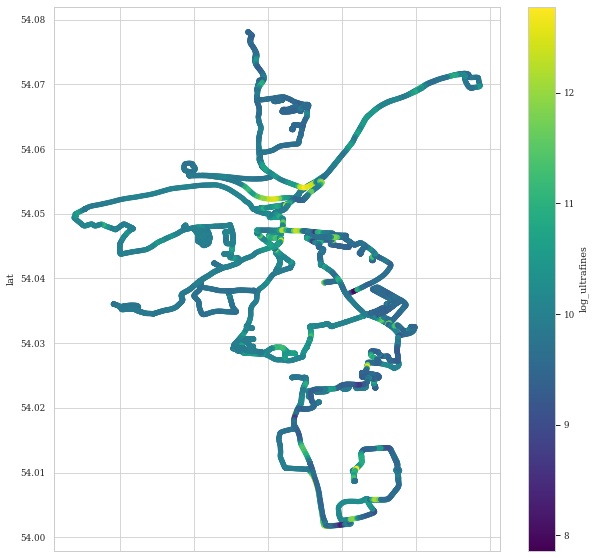

In [6]:
df_trip1[['lat', 'lon', 'log_ultrafines']].plot(x='lon', y='lat', c='log_ultrafines', kind='scatter', cmap='viridis', figsize=(10, 10))
plt.show()

### Geopandas

Notice how the lat and lon has been projected to a UTM coordinate reference system under the geometry, which aids interoperability with networkx and osmnx

In [7]:
gdf = laq.TabularObject().to_geopandas()
gdf.head()

,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index,geometry
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,driving,8.793612,0,POINT (513861.952 5984499.762)
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,driving,8.867287,0,POINT (513861.952 5984499.762)
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,POINT (513861.952 5984499.762)
3,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,POINT (513861.952 5984499.762)
4,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,POINT (513861.952 5984499.762)


We can also load the road meta data sourced from open street map

In [8]:
gdf = laq.TabularObject().to_geopandas_with_metadata()
gdf.head()

/home/amosm1/LancasterAQ/src/LancasterAQ/data/data_object.py:67: UserWarning: This method takes up to two minutes to retrieve all the metadata. You could save the gdf if you wanted.
  warnings.warn("This method takes up to two minutes to retrieve all the metadata. You could save the gdf if you wanted.")


,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index,geometry,osmid,oneway,...,reversed,length,name,service,junction,ref,bridge,access,width,tunnel
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,driving,8.793612,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,driving,8.867287,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,driving,8.923458,0,"LINESTRING (513867.390 5984472.363, 513865.765...",989392,False,...,True,39.481,South Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we can look at a summary of the metadata of road type.

In [9]:
gdf['highway'].value_counts()

residential                           25202
primary                               21249
tertiary                              21236
unclassified                          12903
service                               10146
cycleway                              10015
footway                                5888
motorway                               1743
primary_link                            826
secondary                               563
[cycleway, service]                     483
pedestrian                              447
motorway_link                           440
[cycleway, residential]                 427
[steps, footway]                        273
[residential, footway]                  180
[service, footway]                      159
trunk_link                              156
[footway, residential]                  150
[cycleway, tertiary]                    140
[cycleway, unclassified]                102
path                                     99
[service, residential]          